# <center> Random Forest Regressor - Tuned
**Summary of Actions**
* Custom RMSE evaluation metric on logged values
* A simlpe rangom forest regressor model
 

### Import Preliminaries

In [19]:
%matplotlib inline

# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

# Import data
train_df = pd.DataFrame(pd.read_csv(
    'https://www.dropbox.com/s/8ftdd4tejbmesy4/featured_train_df.csv?dl=1', index_col='Id'))
test_df = pd.DataFrame(pd.read_csv(
    'https://www.dropbox.com/s/h672z8790ehkxuj/featured_test_df.csv?dl=1', index_col='Id'))

# Set pandas options
pd.set_option('precision', 1)
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)
pd.set_option('precision', 3)

# List of dataframe
dfs = [train_df, test_df]

### DataFrame to Values

In [20]:
# Convert training and test data to values
X = train_df.loc[:, train_df.columns != 'SalePrice'].copy().values
y = train_df.SalePrice.values
X_test = test_df.values

### Randomized Search CV

In [21]:
list(range(1,4))

[1, 2, 3]

In [40]:
model = RandomForestRegressor()

# Create the grid
grid = {'n_estimators': list(range(1,250)),
        'max_features':list(range(1,312)),
        'max_depth': list(range(1,50)),
        'min_samples_leaf':list(range(1,50)),
        'bootstrap': [True, False]}

models = RandomizedSearchCV(estimator=model,
                           param_distributions=grid,
                           scoring='neg_mean_squared_log_error', n_jobs=1,
                           refit=True, cv=10)

models.fit(X,y)

# greedy results
print('Accuracy of best params: %.3f' %models.best_score_)
print('Best params: %s' %models.best_params_)

Accuracy of best params: -0.023
Best params: {'n_estimators': 187, 'min_samples_leaf': 11, 'max_features': 155, 'max_depth': 12, 'bootstrap': False}


### Fitting the Model 

In [42]:
models.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 155,
 'min_samples_leaf': 11,
 'n_estimators': 187}

In [45]:
# Creating and fitting the model
model = RandomForestRegressor(bootstrap=False,
                             max_depth=12,
                             max_features= 155,
                             min_samples_leaf= 11,
                             n_estimators= 187)
model.fit(X,y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=12,
           max_features=155, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=187, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Model Predictions

In [48]:
# create predictions dataframe
predictions = pd.DataFrame(test_df.index)
saleprice = pd.DataFrame(model.predict(X_test),
                          columns=['SalePrice'])
predictions = pd.concat([predictions, saleprice],axis=1)

In [49]:
# View training predictions
train_df_prediction = pd.DataFrame(model.predict(X), columns=['Pred SalePrice'])
train_df_prediction = train_df_prediction.set_index(train_df.index)
train_df_prediction = pd.concat([train_df['SalePrice'], train_df_prediction], axis=1)
train_df_prediction.sample(3)

,SalePrice,Pred SalePrice
Id,,
419,126000.0,106626.230
950,197500.0,178421.470
209,277000.0,261569.586


### Residual Plot

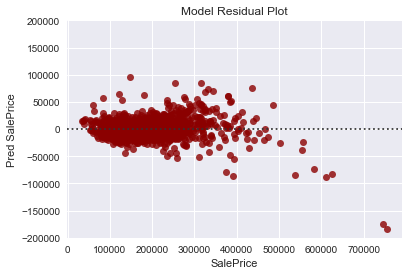

In [50]:
# Plotting training data residuals
residplot = sns.residplot(
    train_df.SalePrice, train_df_prediction['Pred SalePrice'], color='darkred')
plt.title('Model Residual Plot')
residplot.set(ylim=(-200000, 200000))
residplot

### Model Crossvalidation

In [51]:
# Creating list to store KFold scores
scores = list()

# Retrieve KFold scorse on test data, 10 folds
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    y_pred = pd.Series(model.predict(X_test))
    y_test = pd.Series(y_test)

    rmse = sqrt(mean_squared_error(np.log(y_test), np.log(np.abs(y_pred))))

    scores.append(rmse)

# Mean Logged RMSE Evaulation metric for our model
scores = pd.Series(scores, name='Scores')
print('Logged RMSE:', round(scores.mean(),4))

Logged RMSE: 0.1497


### Export Results

In [53]:
# Exporting data without index
predictions.to_csv('Submissions/rfg_tuned_predicition.csv', index=False)

### Accuracy Scores

<br>Feature Enginnering 2 - RMSE: 0.1497

### Kaggle Scores

<br>Feature Engineering 2 - RMSE: 0.15934